In [7]:
#word2vec
from gensim import models

w = models.Word2Vec.load_word2vec_format('C:/Users/admin/Desktop/새홀리기/GoogleNews-vectors-negative300.bin', binary = True)
#구글에서 훈련시킨 모델 불러오기
print('King - man + woman')
print("")
print(w.wv.most_similar(positive = ['woman', 'king'], negative = ['man']))#woman과 king에서 man의 의미론적 부분을 뺀것

print('Similarity betwwen man and woman:')
print(w.similarity('woman', 'man')) #woman과 man의 유사성


King - man + woman

[('queen', 0.7118191719055176), ('monarch', 0.6189674139022827), ('princess', 0.5902431011199951), ('crown_prince', 0.5499460697174072), ('prince', 0.5377321243286133), ('kings', 0.5236844420433044), ('Queen_Consort', 0.5235945582389832), ('queens', 0.5181134343147278), ('sultan', 0.5098593235015869), ('monarchy', 0.5087411403656006)]
Similarity betwwen man and woman:
0.7664012230995352


In [13]:
#google이 훈련한 모델에 대한 불용어 처리 사실
from gensim import models

if 'the' in w.wv.vocab:
    print("Vector fro word 'the \n")
    print(w.wv['the']) #'the'에 대한 word vector 생성
else:
    print("Vocabulary doesn't include word 'the'\n")

if 'a' in w.wv.vocab:
    print("Vector for word 'a'\n")
    print(w.wv['a'])
else:
    print("Vocabulary doesn't include word 'a'\n")

Vector fro word 'the 

[ 0.08007812  0.10498047  0.04980469  0.0534668  -0.06738281 -0.12060547
  0.03515625 -0.11865234  0.04394531  0.03015137 -0.05688477 -0.07617188
  0.01287842  0.04980469 -0.08496094 -0.06347656  0.00628662 -0.04321289
  0.02026367  0.01330566 -0.01953125  0.09277344 -0.171875   -0.00131989
  0.06542969  0.05834961 -0.08251953  0.0859375  -0.00318909  0.05859375
 -0.03491211 -0.0123291  -0.0480957  -0.00302124  0.05639648  0.01495361
 -0.07226562 -0.05224609  0.09667969  0.04296875 -0.03540039 -0.07324219
  0.03271484 -0.06176758  0.00787354  0.0035553  -0.00878906  0.0390625
  0.03833008  0.04443359  0.06982422  0.01263428 -0.00445557 -0.03320312
 -0.04272461  0.09765625 -0.02160645 -0.0378418   0.01190186 -0.01391602
 -0.11328125  0.09326172 -0.03930664 -0.11621094  0.02331543 -0.01599121
  0.02636719  0.10742188 -0.00466919  0.09619141  0.0279541  -0.05395508
  0.08544922 -0.03686523 -0.02026367 -0.08544922  0.125       0.14453125
  0.0267334   0.15039062  0.0

In [1]:
#실제 데이터를 이용해 word2vec를 훈련시켜 이용해보기
from __future__ import absolute_import, division, print_function

In [2]:
import codecs
import glob
import logging
import multiprocessing
import os
import pprint
import re

In [28]:
import nltk
import gensim.models.word2vec as w2v
import sklearn.manifold
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [4]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [6]:
nltk.download('punkt')
nltk.download("stopwords")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
book_filenames = sorted(glob.glob("C:/Users\admin/Desktop/새홀리기/game_of_thrones/*.txt"))
#glob를 사용하여 디렉터리에 있는 모든 텍스트  불러온다

In [8]:
print("Found books : ")
book_filenames#해당 변수에 들어있는 파일 리턴

Found books : 


[]

In [9]:
corpus_raw = u""
for book_filename in book_filenames:
    print("Reading '{0}'...".format(book_filename))
    with codecs.open(book_filename, "r", "utf-8") as book_file:
        corpus_raw += book_file.read()
    print("Corpus is now {0} characters long".format(len(corpus_raw)))
    print()
    

In [10]:
corpus_raw = u""
a1 = open("C:/Users/admin/Desktop/새홀리기/game_of_thrones/got1.txt", "r").read()
a2 = open("C:/Users/admin/Desktop/새홀리기/game_of_thrones/got2.txt", "r").read()
a3 = open("C:/Users/admin/Desktop/새홀리기/game_of_thrones/got3.txt", "r").read()
a4 = open("C:/Users/admin/Desktop/새홀리기/game_of_thrones/got4.txt", "r").read()
a5 = open("C:/Users/admin/Desktop/새홀리기/game_of_thrones/got5.txt", "r").read()

In [11]:
corpus_raw = a1 + a2 + a3 + a4 + a5

In [17]:
from nltk.tokenize import sent_tokenize
raw_sentences = sent_tokenize(corpus_raw)

In [18]:
#토큰화 한 문장을 단어로 바꿔줌
#불필요한 ,나 - 등 단어를 나눠주는 표식들을 없애줌
def sentence_to_wordlist(raw):
    clean = re.sub("[^a-zA-Z]"," ", raw)
    words = clean.split()
    return words

In [22]:
#각 단어가 토큰화 된 문장
sentences = []
for raw_sentence in raw_sentences:
    if len(raw_sentence) > 0:
        sentences.append(sentence_to_wordlist(raw_sentence))

In [24]:
print(raw_sentences[5])
print(sentence_to_wordlist(raw_sentences[5]))

Heraldic crest by Virginia Norey.
['Heraldic', 'crest', 'by', 'Virginia', 'Norey']


In [25]:
token_count = sum([len(sentence) for sentence in sentences])
print("The book corpus contains {0:,} tokens".format(token_count))

The book corpus contains 1,616,398 tokens


In [26]:
#모델을 빌드하기 위해 distance, similiarity, ranking을 고려함
#차원이 너무 많으면 안좋기 때문에 제한함
num_features = 300
min_word_count = 3 #word count threshold
num_workers = multiprocessing.cpu_count() #more workers, faster we train
context_size = 7 #문맥윈도우 숫자 지정
downsampling = 1e-3 #이거보다 적은 빈도수면 drop
seed = 1

In [29]:
#어휘 빌더(모든 어휘 벡터로 변환)
thrones2vec = w2v.Word2Vec(
    sg=1,
    seed=seed,
    workers=num_workers,
    size=num_features,
    min_count=min_word_count,
    window=context_size,
    sample=downsampling
)

In [30]:
#어휘 만들기
thrones2vec.build_vocab(sentences)

2018-09-15 13:10:49,559 : INFO : collecting all words and their counts
2018-09-15 13:10:49,562 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2018-09-15 13:10:49,648 : INFO : PROGRESS: at sentence #10000, processed 140978 words, keeping 10280 word types
2018-09-15 13:10:49,720 : INFO : PROGRESS: at sentence #20000, processed 279674 words, keeping 13557 word types
2018-09-15 13:10:49,780 : INFO : PROGRESS: at sentence #30000, processed 424401 words, keeping 15178 word types
2018-09-15 13:10:49,847 : INFO : PROGRESS: at sentence #40000, processed 563323 words, keeping 15178 word types
2018-09-15 13:10:49,927 : INFO : PROGRESS: at sentence #50000, processed 704869 words, keeping 15178 word types
2018-09-15 13:10:50,018 : INFO : PROGRESS: at sentence #60000, processed 845684 words, keeping 15178 word types
2018-09-15 13:10:50,077 : INFO : PROGRESS: at sentence #70000, processed 982517 words, keeping 15178 word types
2018-09-15 13:10:50,175 : INFO : PROGRESS: at 

In [32]:
print("Word2vec wocabulary length : ", len(thrones2vec.wv.vocab))

Word2vec wocabulary length :  16838


In [34]:
#벡터를 이용해서 모델 훈련
thrones2vec.train(sentences)

2018-09-15 13:12:28,651 : INFO : training model with 2 workers on 16838 vocabulary and 300 features, using sg=1 hs=0 sample=0.001 negative=5 window=7
2018-09-15 13:12:28,654 : INFO : expecting 114618 sentences, matching count from corpus used for vocabulary survey
2018-09-15 13:12:29,927 : INFO : PROGRESS: at 1.09% examples, 61814 words/s, in_qsize 3, out_qsize 0
2018-09-15 13:12:31,018 : INFO : PROGRESS: at 2.34% examples, 66668 words/s, in_qsize 3, out_qsize 0
2018-09-15 13:12:32,067 : INFO : PROGRESS: at 3.61% examples, 69073 words/s, in_qsize 3, out_qsize 0
2018-09-15 13:12:33,077 : INFO : PROGRESS: at 4.81% examples, 70955 words/s, in_qsize 3, out_qsize 0
2018-09-15 13:12:34,080 : INFO : PROGRESS: at 5.81% examples, 69295 words/s, in_qsize 4, out_qsize 0
2018-09-15 13:12:35,193 : INFO : PROGRESS: at 7.08% examples, 69448 words/s, in_qsize 4, out_qsize 0
2018-09-15 13:12:36,202 : INFO : PROGRESS: at 7.82% examples, 66316 words/s, in_qsize 3, out_qsize 0
2018-09-15 13:12:37,201 : IN

2018-09-15 13:13:53,251 : INFO : PROGRESS: at 87.78% examples, 65102 words/s, in_qsize 4, out_qsize 0
2018-09-15 13:13:54,350 : INFO : PROGRESS: at 88.98% examples, 65177 words/s, in_qsize 3, out_qsize 0
2018-09-15 13:13:55,389 : INFO : PROGRESS: at 90.21% examples, 65298 words/s, in_qsize 3, out_qsize 0
2018-09-15 13:13:56,446 : INFO : PROGRESS: at 91.50% examples, 65401 words/s, in_qsize 3, out_qsize 0
2018-09-15 13:13:57,468 : INFO : PROGRESS: at 92.71% examples, 65519 words/s, in_qsize 3, out_qsize 0
2018-09-15 13:13:58,526 : INFO : PROGRESS: at 94.22% examples, 65689 words/s, in_qsize 3, out_qsize 0
2018-09-15 13:13:59,533 : INFO : PROGRESS: at 95.50% examples, 65805 words/s, in_qsize 3, out_qsize 0
2018-09-15 13:14:00,688 : INFO : PROGRESS: at 96.87% examples, 65890 words/s, in_qsize 3, out_qsize 0
2018-09-15 13:14:01,700 : INFO : PROGRESS: at 98.03% examples, 65998 words/s, in_qsize 3, out_qsize 0
2018-09-15 13:14:02,759 : INFO : PROGRESS: at 99.16% examples, 66069 words/s, in_q

6262976

In [36]:
#디렉터리 생성
if not os.path.exists("trained"):
    os.makedirs("trained")

In [37]:
#지금 훈련시킨 모델 위의 디렉토리에 저장
thrones2vec.save(os.path.join("trained", "thrones2vec.w2v"))

2018-09-15 13:19:52,185 : INFO : saving Word2Vec object under trained\thrones2vec.w2v, separately None
2018-09-15 13:19:52,189 : INFO : not storing attribute syn0norm
2018-09-15 13:19:52,198 : INFO : not storing attribute cum_table
2018-09-15 13:19:53,238 : INFO : saved trained\thrones2vec.w2v


In [38]:
#차원 축소를 위한 모델 생성(2차원)
tsne = sklearn.manifold.TSNE(n_components=2, random_state = 0)

In [39]:
#단어의 수 = 열, 벡터의 크기 = 행 인 매트릭스 생성
all_word_vectors_matrix = thrones2vec.wv.syn0

In [40]:
#차원을 2차원으로 축소
all_word_vectors_matrix_2d = tsne.fit_transform(all_word_vectors_matrix)

In [41]:
points = pd.DataFrame(
    [
        (word, coords[0], coords[1])
        for word, coords in [
            (word, all_word_vectors_matrix_2d[thrones2vec.vocab[word].index])
            for word in thrones2vec.vocab
        ]
    ],
    columns = ["word", "x", "y"]
)

2018-09-15 13:49:52,835 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:49:52,843 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:49:52,849 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:49:52,857 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:49:52,863 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:49:52,867 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:49:52,875 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:49:52,881 : WARNING : direct access to vocab wil

2018-09-15 13:49:54,026 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:49:54,031 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:49:54,040 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:49:54,045 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:49:54,056 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:49:54,072 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:49:54,084 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:49:54,100 : WARNING : direct access to vocab wil

2018-09-15 13:49:54,857 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:49:54,883 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:49:54,898 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:49:54,911 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:49:54,921 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:49:54,928 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:49:54,931 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:49:54,938 : WARNING : direct access to vocab wil

2018-09-15 13:49:56,328 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:49:56,408 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:49:56,409 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:49:56,415 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:49:56,427 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:49:56,432 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:49:56,437 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:49:56,442 : WARNING : direct access to vocab wil

2018-09-15 13:49:57,049 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:49:57,054 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:49:57,063 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:49:57,068 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:49:57,073 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:49:57,076 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:49:57,079 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:49:57,083 : WARNING : direct access to vocab wil

2018-09-15 13:49:57,547 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:49:57,548 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:49:57,550 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:49:57,551 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:49:57,553 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:49:57,554 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:49:57,558 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:49:57,559 : WARNING : direct access to vocab wil

2018-09-15 13:49:58,046 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:49:58,048 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:49:58,050 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:49:58,052 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:49:58,054 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:49:58,056 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:49:58,060 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:49:58,062 : WARNING : direct access to vocab wil

2018-09-15 13:49:58,445 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:49:58,447 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:49:58,449 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:49:58,452 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:49:58,456 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:49:58,458 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:49:58,460 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:49:58,462 : WARNING : direct access to vocab wil

2018-09-15 13:49:58,970 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:49:58,972 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:49:58,973 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:49:58,975 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:49:58,977 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:49:58,978 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:49:58,980 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:49:58,984 : WARNING : direct access to vocab wil

2018-09-15 13:49:59,241 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:49:59,244 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:49:59,246 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:49:59,249 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:49:59,251 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:49:59,252 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:49:59,254 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:49:59,256 : WARNING : direct access to vocab wil

2018-09-15 13:49:59,640 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:49:59,645 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:49:59,648 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:49:59,698 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:49:59,701 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:49:59,704 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:49:59,706 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:49:59,708 : WARNING : direct access to vocab wil

2018-09-15 13:50:00,103 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:00,105 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:00,106 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:00,108 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:00,110 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:00,112 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:00,114 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:00,116 : WARNING : direct access to vocab wil

2018-09-15 13:50:00,542 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:00,543 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:00,544 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:00,546 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:00,561 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:00,645 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:00,648 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:00,650 : WARNING : direct access to vocab wil

2018-09-15 13:50:01,306 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:01,308 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:01,310 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:01,312 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:01,314 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:01,315 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:01,317 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:01,319 : WARNING : direct access to vocab wil

2018-09-15 13:50:01,781 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:01,784 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:01,785 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:01,787 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:01,789 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:01,790 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:01,792 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:01,793 : WARNING : direct access to vocab wil

2018-09-15 13:50:02,171 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:02,173 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:02,175 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:02,177 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:02,179 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:02,181 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:02,205 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:02,207 : WARNING : direct access to vocab wil

2018-09-15 13:50:02,611 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:02,613 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:02,615 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:02,616 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:02,618 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:02,620 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:02,621 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:02,623 : WARNING : direct access to vocab wil

2018-09-15 13:50:03,139 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:03,141 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:03,143 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:03,146 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:03,148 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:03,150 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:03,204 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:03,207 : WARNING : direct access to vocab wil

2018-09-15 13:50:03,683 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:03,685 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:03,686 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:03,688 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:03,689 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:03,716 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:03,856 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:03,859 : WARNING : direct access to vocab wil

2018-09-15 13:50:04,300 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:04,302 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:04,304 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:04,306 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:04,308 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:04,310 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:04,312 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:04,314 : WARNING : direct access to vocab wil

2018-09-15 13:50:04,705 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:04,708 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:04,712 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:04,713 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:04,728 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:04,800 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:04,802 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:04,804 : WARNING : direct access to vocab wil

2018-09-15 13:50:05,127 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:05,142 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:05,157 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:05,159 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:05,174 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:05,176 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:05,180 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:05,184 : WARNING : direct access to vocab wil

2018-09-15 13:50:05,536 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:05,538 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:05,540 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:05,542 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:05,543 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:05,545 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:05,547 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:05,584 : WARNING : direct access to vocab wil

2018-09-15 13:50:05,927 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:05,930 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:05,932 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:05,934 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:05,940 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:05,941 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:05,942 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:05,945 : WARNING : direct access to vocab wil

2018-09-15 13:50:06,435 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:06,438 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:06,441 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:06,443 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:06,445 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:06,447 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:06,449 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:06,451 : WARNING : direct access to vocab wil

2018-09-15 13:50:06,894 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:06,896 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:06,905 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:06,915 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:07,089 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:07,091 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:07,093 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:07,095 : WARNING : direct access to vocab wil

2018-09-15 13:50:07,411 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:07,414 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:07,416 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:07,418 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:07,420 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:07,422 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:07,424 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:07,425 : WARNING : direct access to vocab wil

2018-09-15 13:50:07,836 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:07,837 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:07,842 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:07,843 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:07,844 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:07,861 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:07,959 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:07,961 : WARNING : direct access to vocab wil

2018-09-15 13:50:08,125 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:08,127 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:08,129 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:08,132 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:08,134 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:08,246 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:08,248 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:08,250 : WARNING : direct access to vocab wil

2018-09-15 13:50:08,625 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:08,627 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:08,628 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:08,630 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:08,632 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:08,634 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:08,636 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:08,639 : WARNING : direct access to vocab wil

2018-09-15 13:50:09,048 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:09,050 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:09,051 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:09,052 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:09,099 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:09,167 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:09,170 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:09,172 : WARNING : direct access to vocab wil

2018-09-15 13:50:09,385 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:09,488 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:09,498 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:09,500 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:09,502 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:09,504 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:09,506 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:09,508 : WARNING : direct access to vocab wil

2018-09-15 13:50:09,882 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:09,884 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:09,897 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:09,899 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:09,900 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:09,902 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:09,904 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:09,906 : WARNING : direct access to vocab wil

2018-09-15 13:50:10,270 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:10,273 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:10,276 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:10,279 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:10,281 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:10,282 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:10,284 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:10,286 : WARNING : direct access to vocab wil

2018-09-15 13:50:10,554 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:10,555 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:10,558 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:10,561 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:10,563 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:10,564 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:10,566 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:10,568 : WARNING : direct access to vocab wil

2018-09-15 13:50:10,792 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:10,794 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:10,797 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:10,799 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:10,860 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:10,919 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:10,921 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:10,924 : WARNING : direct access to vocab wil

2018-09-15 13:50:11,151 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:11,153 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:11,154 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:11,156 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:11,158 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:11,160 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:11,162 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:11,271 : WARNING : direct access to vocab wil

2018-09-15 13:50:11,566 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:11,568 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:11,569 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:11,571 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:11,573 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:11,575 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:11,577 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:11,579 : WARNING : direct access to vocab wil

2018-09-15 13:50:12,104 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:12,107 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:12,112 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:12,115 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:12,117 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:12,120 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:12,122 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:12,124 : WARNING : direct access to vocab wil

2018-09-15 13:50:12,475 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:12,478 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:12,481 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:12,483 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:12,484 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:12,486 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:12,488 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:12,489 : WARNING : direct access to vocab wil

2018-09-15 13:50:12,756 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:12,758 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:12,759 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:12,762 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:12,764 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:12,766 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:12,768 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:12,769 : WARNING : direct access to vocab wil

2018-09-15 13:50:13,456 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:13,457 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:13,459 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:13,461 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:13,463 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:13,465 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:13,467 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:13,469 : WARNING : direct access to vocab wil

2018-09-15 13:50:13,768 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:13,769 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:13,771 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:13,773 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:13,774 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:13,776 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:13,778 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:13,779 : WARNING : direct access to vocab wil

2018-09-15 13:50:14,051 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:14,053 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:14,056 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:14,057 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:14,059 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:14,062 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:14,063 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:14,064 : WARNING : direct access to vocab wil

2018-09-15 13:50:14,754 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:14,792 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:14,794 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:14,797 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:14,799 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:14,801 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:14,803 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:14,805 : WARNING : direct access to vocab wil

2018-09-15 13:50:15,032 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:15,114 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:15,116 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:15,118 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:15,121 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:15,123 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:15,125 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:15,128 : WARNING : direct access to vocab wil

2018-09-15 13:50:15,293 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:15,295 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:15,352 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:15,356 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:15,358 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:15,360 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:15,363 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:15,365 : WARNING : direct access to vocab wil

2018-09-15 13:50:15,802 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:15,855 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:15,873 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:15,887 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:15,889 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:15,891 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:15,893 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:15,900 : WARNING : direct access to vocab wil

2018-09-15 13:50:16,381 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:16,384 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:16,387 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:16,389 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:16,392 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:16,395 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:16,398 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:16,400 : WARNING : direct access to vocab wil

2018-09-15 13:50:16,832 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:16,835 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:16,838 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:16,840 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:16,845 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:16,848 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:16,850 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:16,853 : WARNING : direct access to vocab wil

2018-09-15 13:50:17,091 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:17,094 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:17,240 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:17,241 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:17,255 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:17,257 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:17,258 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:17,261 : WARNING : direct access to vocab wil

2018-09-15 13:50:17,464 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:17,465 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:17,467 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:17,468 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:17,545 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:17,547 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:17,549 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:17,564 : WARNING : direct access to vocab wil

2018-09-15 13:50:17,845 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:17,846 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:17,847 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:17,848 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:17,850 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:17,850 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:17,852 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:17,853 : WARNING : direct access to vocab wil

2018-09-15 13:50:18,048 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:18,050 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:18,052 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:18,053 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:18,055 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:18,056 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:18,058 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:18,059 : WARNING : direct access to vocab wil

2018-09-15 13:50:18,563 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:18,621 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:18,623 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:18,627 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:18,629 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:18,630 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:18,632 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:18,633 : WARNING : direct access to vocab wil

2018-09-15 13:50:19,113 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:19,115 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:19,117 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:19,119 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:19,120 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:19,121 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:19,123 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:19,124 : WARNING : direct access to vocab wil

2018-09-15 13:50:19,372 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:19,374 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:19,378 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:19,380 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:19,382 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:19,384 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:19,386 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:19,388 : WARNING : direct access to vocab wil

2018-09-15 13:50:19,997 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:19,999 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:20,002 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:20,004 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:20,006 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:20,008 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:20,010 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:20,013 : WARNING : direct access to vocab wil

2018-09-15 13:50:20,346 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:20,348 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:20,349 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:20,350 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:20,351 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:20,352 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:20,353 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:20,354 : WARNING : direct access to vocab wil

2018-09-15 13:50:20,588 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:20,590 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:20,591 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:20,593 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:20,594 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:20,596 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:20,597 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:20,600 : WARNING : direct access to vocab wil

2018-09-15 13:50:21,050 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:21,052 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:21,053 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:21,054 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:21,055 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:21,056 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:21,057 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:21,059 : WARNING : direct access to vocab wil

2018-09-15 13:50:21,253 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:21,255 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:21,256 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:21,258 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:21,259 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:21,261 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:21,262 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:21,264 : WARNING : direct access to vocab wil

2018-09-15 13:50:21,485 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:21,486 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:21,487 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:21,488 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:21,489 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:21,513 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:21,593 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:21,595 : WARNING : direct access to vocab wil

2018-09-15 13:50:22,036 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:22,038 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:22,040 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:22,041 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:22,045 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:22,053 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:22,055 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:22,056 : WARNING : direct access to vocab wil

2018-09-15 13:50:22,204 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:22,205 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:22,206 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:22,230 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:22,309 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:22,311 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:22,313 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:22,315 : WARNING : direct access to vocab wil

2018-09-15 13:50:22,647 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:22,649 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:22,650 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:22,652 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:22,655 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:22,656 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:22,658 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:22,660 : WARNING : direct access to vocab wil

2018-09-15 13:50:22,925 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:22,927 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:22,929 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:22,930 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:22,932 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:22,933 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:22,936 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:22,938 : WARNING : direct access to vocab wil

2018-09-15 13:50:23,404 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:23,406 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:23,407 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:23,409 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:23,410 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:23,412 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:23,413 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:23,415 : WARNING : direct access to vocab wil

2018-09-15 13:50:23,606 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:23,608 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:23,707 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:23,708 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:23,709 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:23,710 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:23,711 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:23,712 : WARNING : direct access to vocab wil

2018-09-15 13:50:24,123 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:24,126 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:24,127 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:24,128 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:24,129 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:24,130 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:24,131 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:24,132 : WARNING : direct access to vocab wil

2018-09-15 13:50:24,464 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:24,475 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:24,477 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:24,479 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:24,481 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:24,484 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:24,485 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:24,487 : WARNING : direct access to vocab wil

2018-09-15 13:50:24,740 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:24,742 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:24,743 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:24,745 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:24,746 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:24,748 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:24,749 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:24,751 : WARNING : direct access to vocab wil

2018-09-15 13:50:25,012 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:25,012 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:25,013 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:25,015 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:25,017 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:25,022 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:25,171 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:25,173 : WARNING : direct access to vocab wil

2018-09-15 13:50:25,735 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:25,736 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:25,738 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:25,740 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:25,741 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:25,743 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:25,744 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:25,746 : WARNING : direct access to vocab wil

2018-09-15 13:50:26,193 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:26,232 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:26,234 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:26,236 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:26,238 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:26,240 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:26,242 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:26,244 : WARNING : direct access to vocab wil

2018-09-15 13:50:26,504 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:26,505 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:26,507 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:26,508 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:26,510 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:26,512 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:26,515 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:26,516 : WARNING : direct access to vocab wil

2018-09-15 13:50:27,100 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:27,101 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:27,103 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:27,104 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:27,217 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:27,220 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:27,222 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:27,224 : WARNING : direct access to vocab wil

2018-09-15 13:50:27,528 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:27,531 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:27,533 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:27,534 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:27,537 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:27,538 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:27,541 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:27,543 : WARNING : direct access to vocab wil

2018-09-15 13:50:27,726 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:27,728 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:27,730 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:27,732 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:27,734 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:27,736 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:27,737 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:27,738 : WARNING : direct access to vocab wil

2018-09-15 13:50:28,034 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:28,082 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:28,083 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:28,085 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:28,300 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:28,301 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:28,303 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:28,304 : WARNING : direct access to vocab wil

2018-09-15 13:50:28,590 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:28,591 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:28,593 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:28,594 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:28,596 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:28,598 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:28,599 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:28,600 : WARNING : direct access to vocab wil

2018-09-15 13:50:29,003 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:29,005 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:29,007 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:29,008 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:29,010 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:29,012 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:29,014 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:29,015 : WARNING : direct access to vocab wil

2018-09-15 13:50:29,223 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:29,225 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:29,227 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:29,229 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:29,230 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:29,231 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:29,292 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:29,294 : WARNING : direct access to vocab wil

2018-09-15 13:50:29,790 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:29,793 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:29,795 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:29,797 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:29,799 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:29,801 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:29,804 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:29,806 : WARNING : direct access to vocab wil

2018-09-15 13:50:30,084 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:30,086 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:30,088 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:30,090 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:30,091 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:30,093 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:30,095 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:30,096 : WARNING : direct access to vocab wil

2018-09-15 13:50:30,274 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:30,275 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:30,277 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:30,278 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:30,342 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:30,344 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:30,346 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:30,347 : WARNING : direct access to vocab wil

2018-09-15 13:50:31,062 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:31,063 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:31,066 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:31,068 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:31,070 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:31,072 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:31,074 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:31,076 : WARNING : direct access to vocab wil

2018-09-15 13:50:31,395 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:31,397 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:31,398 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:31,400 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:31,401 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:31,403 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:31,404 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:31,407 : WARNING : direct access to vocab wil

2018-09-15 13:50:31,684 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:31,686 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:31,688 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:31,707 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:31,801 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:31,803 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:31,804 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:31,807 : WARNING : direct access to vocab wil

2018-09-15 13:50:32,076 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:32,077 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:32,078 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:32,079 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:32,081 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:32,081 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:32,083 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:32,084 : WARNING : direct access to vocab wil

2018-09-15 13:50:32,430 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:32,431 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:32,432 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:32,452 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:32,524 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:32,525 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:32,527 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:32,528 : WARNING : direct access to vocab wil

2018-09-15 13:50:32,960 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:32,962 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:32,964 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:32,966 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:32,968 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:32,970 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:32,972 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:32,974 : WARNING : direct access to vocab wil

2018-09-15 13:50:33,403 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:33,405 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:33,407 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:33,409 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:33,411 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:33,413 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:33,415 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:33,416 : WARNING : direct access to vocab wil

2018-09-15 13:50:33,608 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:33,609 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:33,610 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:33,612 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:33,613 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:33,614 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:33,615 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:33,617 : WARNING : direct access to vocab wil

2018-09-15 13:50:34,241 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:34,242 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:34,244 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:34,250 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:34,251 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:34,252 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:34,267 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:34,342 : WARNING : direct access to vocab wil

2018-09-15 13:50:34,586 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:34,588 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:34,589 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:34,591 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:34,593 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:34,594 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:34,596 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:34,597 : WARNING : direct access to vocab wil

2018-09-15 13:50:34,790 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:34,793 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:34,795 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:34,797 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:34,799 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:34,801 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:34,803 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:34,805 : WARNING : direct access to vocab wil

2018-09-15 13:50:35,041 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:35,043 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:35,045 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:35,047 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:35,049 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:35,051 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:35,053 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:35,055 : WARNING : direct access to vocab wil

2018-09-15 13:50:35,385 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:35,385 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:35,387 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:35,388 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:35,390 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:35,393 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:35,395 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:35,396 : WARNING : direct access to vocab wil

2018-09-15 13:50:35,914 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:35,915 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:35,917 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:35,918 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:35,920 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:35,921 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:35,923 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:35,924 : WARNING : direct access to vocab wil

2018-09-15 13:50:36,206 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:36,207 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:36,209 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:36,212 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:36,213 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:36,214 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:36,216 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:36,217 : WARNING : direct access to vocab wil

2018-09-15 13:50:36,441 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:36,443 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:36,444 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:36,446 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:36,448 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:36,449 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:36,451 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:36,452 : WARNING : direct access to vocab wil

2018-09-15 13:50:36,941 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:36,942 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:36,944 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:36,946 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:36,947 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:36,949 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:36,950 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:36,952 : WARNING : direct access to vocab wil

2018-09-15 13:50:37,079 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:37,150 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:37,153 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:37,154 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:37,157 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:37,159 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:37,161 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:37,162 : WARNING : direct access to vocab wil

2018-09-15 13:50:37,362 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:37,363 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:37,364 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:37,365 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:37,366 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:37,474 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:37,476 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:37,478 : WARNING : direct access to vocab wil

2018-09-15 13:50:37,965 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:37,967 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:37,968 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:37,970 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:37,971 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:37,973 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:37,975 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:37,978 : WARNING : direct access to vocab wil

2018-09-15 13:50:38,230 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:38,231 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:38,232 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:38,234 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:38,236 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:38,237 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:38,238 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:38,239 : WARNING : direct access to vocab wil

2018-09-15 13:50:38,592 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:38,594 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:38,595 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:38,597 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:38,598 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:38,600 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:38,601 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:38,603 : WARNING : direct access to vocab wil

2018-09-15 13:50:38,917 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:38,920 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:38,922 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:38,924 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:38,926 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:38,928 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:39,266 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:39,269 : WARNING : direct access to vocab wil

2018-09-15 13:50:39,401 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:39,402 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:39,445 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:39,447 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:39,449 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:39,451 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:39,453 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:39,455 : WARNING : direct access to vocab wil

2018-09-15 13:50:39,624 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:39,625 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:39,627 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:39,629 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:39,698 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:39,699 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:39,701 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:39,703 : WARNING : direct access to vocab wil

2018-09-15 13:50:39,959 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:39,961 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:39,962 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:39,964 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:39,967 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:39,969 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:39,970 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:39,972 : WARNING : direct access to vocab wil

2018-09-15 13:50:40,654 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:40,656 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:40,657 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:40,658 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:40,659 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:40,660 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:40,662 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:40,666 : WARNING : direct access to vocab wil

2018-09-15 13:50:41,061 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:41,062 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:41,063 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:41,065 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:41,066 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:41,067 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:41,068 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:41,069 : WARNING : direct access to vocab wil

2018-09-15 13:50:41,416 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:41,417 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:41,419 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:41,420 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:41,422 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:41,424 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:41,425 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:41,427 : WARNING : direct access to vocab wil

2018-09-15 13:50:41,988 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:41,990 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:41,991 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:41,992 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:41,997 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:41,998 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:41,999 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:42,001 : WARNING : direct access to vocab wil

2018-09-15 13:50:42,251 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:42,253 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:42,255 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:42,257 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:42,258 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:42,260 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:42,261 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:42,263 : WARNING : direct access to vocab wil

2018-09-15 13:50:42,458 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:42,460 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:42,462 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:42,464 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:42,466 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:42,469 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:42,470 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:42,472 : WARNING : direct access to vocab wil

2018-09-15 13:50:42,765 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:42,768 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:42,918 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:42,920 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:42,922 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:42,923 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:42,925 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:42,927 : WARNING : direct access to vocab wil

2018-09-15 13:50:43,307 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:43,308 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:43,310 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:43,311 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:43,312 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:43,313 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:43,314 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:43,315 : WARNING : direct access to vocab wil

2018-09-15 13:50:43,417 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:43,418 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:43,419 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:43,420 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:43,421 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:43,423 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:43,424 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:43,425 : WARNING : direct access to vocab wil

2018-09-15 13:50:43,871 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:43,872 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:43,873 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:43,874 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:43,875 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:43,876 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:43,877 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:43,878 : WARNING : direct access to vocab wil

2018-09-15 13:50:43,995 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:43,995 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:43,996 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:43,997 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:43,998 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:43,999 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:44,080 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:44,081 : WARNING : direct access to vocab wil

2018-09-15 13:50:44,337 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:44,338 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:44,339 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:44,363 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:44,418 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:44,419 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:44,420 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:44,422 : WARNING : direct access to vocab wil

2018-09-15 13:50:44,594 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:44,595 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:44,596 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:44,597 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:44,598 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:44,599 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:44,600 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:44,601 : WARNING : direct access to vocab wil

2018-09-15 13:50:44,698 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:44,699 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:44,700 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:44,701 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:44,702 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:44,703 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:44,704 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:44,705 : WARNING : direct access to vocab wil

2018-09-15 13:50:44,881 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:44,882 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:44,882 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:44,884 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:44,885 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:44,886 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:44,887 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:44,888 : WARNING : direct access to vocab wil

2018-09-15 13:50:45,234 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:45,235 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:45,236 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:45,237 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:45,239 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:45,240 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:45,241 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:45,242 : WARNING : direct access to vocab wil

2018-09-15 13:50:45,357 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:45,358 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:45,359 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:45,360 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:45,380 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:45,382 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:45,382 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:45,383 : WARNING : direct access to vocab wil

2018-09-15 13:50:45,888 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:45,890 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:45,892 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:45,894 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:45,896 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:45,897 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:45,901 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:45,903 : WARNING : direct access to vocab wil

2018-09-15 13:50:46,223 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:46,225 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:46,228 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:46,230 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:46,232 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:46,271 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:46,272 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:46,274 : WARNING : direct access to vocab wil

2018-09-15 13:50:46,426 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:46,429 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:46,431 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:46,433 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:46,434 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:46,436 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:46,437 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:46,439 : WARNING : direct access to vocab wil

2018-09-15 13:50:46,673 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:46,674 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:46,676 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:46,678 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:46,679 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:46,680 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:46,682 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:46,683 : WARNING : direct access to vocab wil

2018-09-15 13:50:47,158 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:47,160 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:47,162 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:47,164 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:47,166 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:47,168 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:47,169 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:47,171 : WARNING : direct access to vocab wil

2018-09-15 13:50:47,384 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:47,404 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:47,519 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:47,521 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:47,523 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:47,525 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:47,527 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:47,529 : WARNING : direct access to vocab wil

2018-09-15 13:50:47,925 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:47,926 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:47,928 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:47,929 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:47,931 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:47,933 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:47,935 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:47,937 : WARNING : direct access to vocab wil

2018-09-15 13:50:48,079 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:48,080 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:48,081 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:48,081 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:48,082 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:48,083 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:48,084 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:48,085 : WARNING : direct access to vocab wil

2018-09-15 13:50:48,403 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:48,404 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:48,405 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:48,407 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:48,408 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:48,409 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:48,410 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:48,411 : WARNING : direct access to vocab wil

2018-09-15 13:50:48,522 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:48,523 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:48,524 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:48,525 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:48,526 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:48,527 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:48,528 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:48,528 : WARNING : direct access to vocab wil

2018-09-15 13:50:48,652 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:48,652 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:48,655 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:48,656 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:48,656 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:48,657 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:48,658 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:48,659 : WARNING : direct access to vocab wil

2018-09-15 13:50:49,147 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:49,148 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:49,149 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:49,150 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:49,151 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:49,152 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:49,153 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:49,153 : WARNING : direct access to vocab wil

2018-09-15 13:50:49,249 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:49,250 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:49,252 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:49,252 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:49,253 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:49,255 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:49,256 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:49,256 : WARNING : direct access to vocab wil

2018-09-15 13:50:49,363 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:49,364 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:49,364 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:49,365 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:49,366 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:49,367 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:49,368 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:49,368 : WARNING : direct access to vocab wil

2018-09-15 13:50:49,967 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:49,968 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:50,034 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:50,035 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:50,036 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:50,037 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:50,037 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:50,038 : WARNING : direct access to vocab wil

2018-09-15 13:50:50,224 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:50,225 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:50,226 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:50,227 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:50,227 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:50,228 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:50,229 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:50,230 : WARNING : direct access to vocab wil

2018-09-15 13:50:53,261 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:53,262 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:53,264 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:53,266 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:53,267 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:53,269 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:53,271 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:53,273 : WARNING : direct access to vocab wil

2018-09-15 13:50:53,978 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:54,074 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:54,075 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:54,076 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:54,077 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:54,078 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:54,080 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:54,081 : WARNING : direct access to vocab wil

2018-09-15 13:50:54,295 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:54,297 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:54,298 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:54,300 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:54,301 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:54,302 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:54,303 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:54,304 : WARNING : direct access to vocab wil

2018-09-15 13:50:54,700 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:54,701 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:54,703 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:54,705 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:54,707 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:54,709 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:54,710 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:54,712 : WARNING : direct access to vocab wil

2018-09-15 13:50:54,993 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:54,995 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:54,997 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:54,999 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:55,000 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:55,002 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:55,004 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:55,005 : WARNING : direct access to vocab wil

2018-09-15 13:50:55,274 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:55,276 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:55,279 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:55,283 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:55,285 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:55,287 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:55,289 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:55,291 : WARNING : direct access to vocab wil

2018-09-15 13:50:55,499 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:55,502 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:55,511 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:55,513 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:55,515 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:55,517 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:55,518 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:55,521 : WARNING : direct access to vocab wil

2018-09-15 13:50:55,722 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:55,725 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:55,726 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:55,728 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:55,731 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:55,879 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:55,882 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:55,884 : WARNING : direct access to vocab wil

2018-09-15 13:50:56,532 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:56,533 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:56,535 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:56,537 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:56,538 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:56,541 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:56,542 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:56,543 : WARNING : direct access to vocab wil

2018-09-15 13:50:56,756 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:56,758 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:56,760 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:56,762 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:56,764 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:56,766 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:56,767 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:56,769 : WARNING : direct access to vocab wil

2018-09-15 13:50:56,934 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:56,936 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:56,936 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:56,937 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:57,026 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:57,028 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:57,031 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:57,034 : WARNING : direct access to vocab wil

2018-09-15 13:50:57,509 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:57,511 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:57,513 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:57,515 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:57,517 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:57,519 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:57,521 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:57,523 : WARNING : direct access to vocab wil

2018-09-15 13:50:57,719 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:57,721 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:57,723 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:57,725 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:57,727 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:57,729 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:57,733 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:57,734 : WARNING : direct access to vocab wil

2018-09-15 13:50:57,982 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:57,983 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:57,985 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:57,986 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:57,987 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:57,988 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:57,989 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:57,991 : WARNING : direct access to vocab wil

2018-09-15 13:50:58,435 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:58,436 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:58,439 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:58,441 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:58,442 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:58,445 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:58,446 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:58,449 : WARNING : direct access to vocab wil

2018-09-15 13:50:58,593 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:58,594 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:58,596 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:58,617 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:58,727 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:58,730 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:58,732 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:58,734 : WARNING : direct access to vocab wil

2018-09-15 13:50:58,919 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:58,921 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:58,922 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:58,924 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:58,926 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:58,927 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:58,972 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:58,974 : WARNING : direct access to vocab wil

2018-09-15 13:50:59,291 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:59,293 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:59,295 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:59,297 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:59,299 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:59,301 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:59,303 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:59,305 : WARNING : direct access to vocab wil

2018-09-15 13:50:59,465 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:59,466 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:59,467 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:59,527 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:59,530 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:59,532 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:59,534 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:59,536 : WARNING : direct access to vocab wil

2018-09-15 13:50:59,672 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:59,674 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:59,676 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:59,678 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:59,679 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:59,681 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:59,682 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:50:59,684 : WARNING : direct access to vocab wil

2018-09-15 13:51:00,013 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:00,014 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:00,016 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:00,020 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:00,023 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:00,024 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:00,393 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:00,394 : WARNING : direct access to vocab wil

2018-09-15 13:51:00,555 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:00,556 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:00,557 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:00,558 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:00,559 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:00,560 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:00,576 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:00,641 : WARNING : direct access to vocab wil

2018-09-15 13:51:00,789 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:00,790 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:00,792 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:00,797 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:00,865 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:00,867 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:00,869 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:00,872 : WARNING : direct access to vocab wil

2018-09-15 13:51:01,028 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:01,029 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:01,031 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:01,032 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:01,032 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:01,033 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:01,034 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:01,035 : WARNING : direct access to vocab wil

2018-09-15 13:51:01,413 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:01,452 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:01,453 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:01,455 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:01,456 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:01,457 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:01,458 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:01,459 : WARNING : direct access to vocab wil

2018-09-15 13:51:01,545 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:01,546 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:01,548 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:01,549 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:01,551 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:01,552 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:01,553 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:01,554 : WARNING : direct access to vocab wil

2018-09-15 13:51:01,705 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:01,706 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:01,707 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:01,708 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:01,709 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:01,710 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:01,711 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:01,720 : WARNING : direct access to vocab wil

2018-09-15 13:51:02,054 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:02,055 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:02,056 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:02,058 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:02,059 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:02,060 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:02,061 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:02,062 : WARNING : direct access to vocab wil

2018-09-15 13:51:02,307 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:02,352 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:02,353 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:02,354 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:02,355 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:02,357 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:02,358 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:02,359 : WARNING : direct access to vocab wil

2018-09-15 13:51:02,455 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:02,455 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:02,456 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:02,457 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:02,458 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:02,459 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:02,460 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:02,462 : WARNING : direct access to vocab wil

2018-09-15 13:51:02,732 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:02,733 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:02,734 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:02,736 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:02,737 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:02,738 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:02,739 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:02,740 : WARNING : direct access to vocab wil

2018-09-15 13:51:02,806 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:02,807 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:02,808 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:02,811 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:02,812 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:02,812 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:02,813 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:02,860 : WARNING : direct access to vocab wil

2018-09-15 13:51:04,638 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:04,639 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:04,641 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:04,643 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:04,645 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:04,647 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:04,649 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:04,650 : WARNING : direct access to vocab wil

2018-09-15 13:51:04,883 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:04,885 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:04,887 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:05,057 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:05,066 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:05,068 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:05,070 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:05,071 : WARNING : direct access to vocab wil

2018-09-15 13:51:05,227 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:05,229 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:05,231 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:05,233 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:05,235 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:05,237 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:05,239 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:05,241 : WARNING : direct access to vocab wil

2018-09-15 13:51:05,461 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:05,463 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:05,465 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:05,467 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:05,469 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:05,471 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:05,473 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:05,475 : WARNING : direct access to vocab wil

2018-09-15 13:51:05,643 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:05,645 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:05,646 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:05,647 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:05,649 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:05,650 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:05,651 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:05,652 : WARNING : direct access to vocab wil

2018-09-15 13:51:06,207 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:06,208 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:06,210 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:06,211 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:06,212 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:06,212 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:06,213 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:06,215 : WARNING : direct access to vocab wil

2018-09-15 13:51:06,410 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:06,411 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:06,412 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:06,414 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:06,415 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:06,416 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:06,417 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:06,418 : WARNING : direct access to vocab wil

2018-09-15 13:51:06,609 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:06,610 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:06,611 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:06,612 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:06,624 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:06,701 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:06,702 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:06,703 : WARNING : direct access to vocab wil

2018-09-15 13:51:06,827 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:06,828 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:06,829 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:06,830 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:06,831 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:06,832 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:06,833 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:06,834 : WARNING : direct access to vocab wil

2018-09-15 13:51:07,136 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:07,137 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:07,138 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:07,140 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:07,140 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:07,141 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:07,142 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:07,144 : WARNING : direct access to vocab wil

2018-09-15 13:51:07,252 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:07,253 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:07,255 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:07,256 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:07,257 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:07,258 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:07,260 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:07,261 : WARNING : direct access to vocab wil

2018-09-15 13:51:07,527 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:07,529 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:07,530 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:07,531 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:07,532 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:07,533 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:07,535 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:07,536 : WARNING : direct access to vocab wil

2018-09-15 13:51:07,678 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:07,679 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:07,680 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:07,681 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:07,682 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:07,682 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:07,684 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:07,734 : WARNING : direct access to vocab wil

2018-09-15 13:51:08,028 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:08,029 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:08,030 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:08,031 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:08,033 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:08,034 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:08,034 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:08,035 : WARNING : direct access to vocab wil

2018-09-15 13:51:08,189 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:08,190 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:08,228 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:08,257 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:08,258 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:08,259 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:08,261 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:08,263 : WARNING : direct access to vocab wil

2018-09-15 13:51:08,482 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:08,483 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:08,484 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:08,484 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:08,485 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:08,485 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:08,487 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:11,691 : WARNING : direct access to vocab wil

2018-09-15 13:51:11,892 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:11,894 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:11,896 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:11,898 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:11,900 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:11,902 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:11,904 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:11,906 : WARNING : direct access to vocab wil

2018-09-15 13:51:12,356 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:12,358 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:12,360 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:12,361 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:12,362 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:12,363 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:12,364 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:12,365 : WARNING : direct access to vocab wil

2018-09-15 13:51:12,483 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:12,484 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:12,485 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:12,486 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:12,487 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:12,488 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:12,489 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:12,490 : WARNING : direct access to vocab wil

2018-09-15 13:51:12,619 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:12,620 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:12,620 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:12,621 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:12,670 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:12,671 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:12,672 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:12,673 : WARNING : direct access to vocab wil

2018-09-15 13:51:13,175 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:13,176 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:13,177 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:13,178 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:13,180 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:13,181 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:13,182 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:13,183 : WARNING : direct access to vocab wil

2018-09-15 13:51:13,362 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:13,363 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:13,364 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:13,364 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:13,366 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:13,366 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:13,368 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:13,369 : WARNING : direct access to vocab wil

2018-09-15 13:51:13,576 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:13,577 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:13,578 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:13,579 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:13,580 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:13,581 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:13,582 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:13,582 : WARNING : direct access to vocab wil

2018-09-15 13:51:13,829 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:13,830 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:13,831 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:13,832 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:13,833 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:13,835 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:13,836 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:13,837 : WARNING : direct access to vocab wil

2018-09-15 13:51:14,002 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:14,003 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:14,004 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:14,005 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:14,006 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:14,007 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:14,007 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:14,008 : WARNING : direct access to vocab wil

2018-09-15 13:51:14,113 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:14,114 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:14,160 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:14,161 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:14,162 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:14,163 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:14,164 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:14,165 : WARNING : direct access to vocab wil

2018-09-15 13:51:14,620 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:14,621 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:14,622 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:14,624 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:14,625 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:14,626 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:14,627 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:14,628 : WARNING : direct access to vocab wil

2018-09-15 13:51:14,693 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:14,694 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:14,695 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:14,695 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:14,697 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:14,698 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:14,699 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:14,700 : WARNING : direct access to vocab wil

2018-09-15 13:51:14,775 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:14,775 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:14,776 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:14,777 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:14,778 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:14,779 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:14,779 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:14,780 : WARNING : direct access to vocab wil

2018-09-15 13:51:14,911 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:14,911 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:15,174 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:15,175 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:15,176 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:15,177 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:15,178 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:15,179 : WARNING : direct access to vocab wil

2018-09-15 13:51:15,279 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:15,280 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:15,281 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:15,283 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:15,284 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:15,285 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:15,286 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:15,288 : WARNING : direct access to vocab wil

2018-09-15 13:51:15,695 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:15,729 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:15,772 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:15,773 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:15,775 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:15,777 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:15,779 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:15,780 : WARNING : direct access to vocab wil

2018-09-15 13:51:15,983 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:15,985 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:15,988 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:15,989 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:15,990 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:15,992 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:15,994 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:15,995 : WARNING : direct access to vocab wil

2018-09-15 13:51:16,250 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:16,251 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:16,252 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:16,253 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:16,254 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:16,256 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:16,257 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:16,258 : WARNING : direct access to vocab wil

2018-09-15 13:51:16,449 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:16,450 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:16,452 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:16,454 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:16,455 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:16,457 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:16,459 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:16,460 : WARNING : direct access to vocab wil

2018-09-15 13:51:16,670 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:16,671 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:16,673 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:16,675 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:16,676 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:16,678 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:16,680 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:16,681 : WARNING : direct access to vocab wil

2018-09-15 13:51:17,029 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:17,039 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:17,040 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:17,041 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:17,042 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:17,043 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:17,045 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:17,046 : WARNING : direct access to vocab wil

2018-09-15 13:51:17,255 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:17,256 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:17,258 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:17,260 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:17,261 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:17,262 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:17,263 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:17,265 : WARNING : direct access to vocab wil

2018-09-15 13:51:17,437 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:17,438 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:17,440 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:17,441 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:17,444 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:17,445 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:17,447 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:17,448 : WARNING : direct access to vocab wil

2018-09-15 13:51:17,833 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:17,835 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:17,836 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:17,838 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:17,839 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:17,841 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:17,842 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2018-09-15 13:51:17,843 : WARNING : direct access to vocab wil

In [42]:
points.head(10)

,word,x,y
0,This,35.445415,-20.945753
1,edition,-44.263630,-45.404797
2,contains,-37.461201,-28.693600
3,the,58.736683,15.641941
4,complete,-11.863809,-19.431772
5,text,-37.476810,-28.827330
6,of,-18.833578,-26.999838
7,original,-37.566120,-29.198177
8,hardcover,-42.636101,-38.681408
9,NOT,-17.584158,-4.166984


In [43]:
sns.set_context("poster")

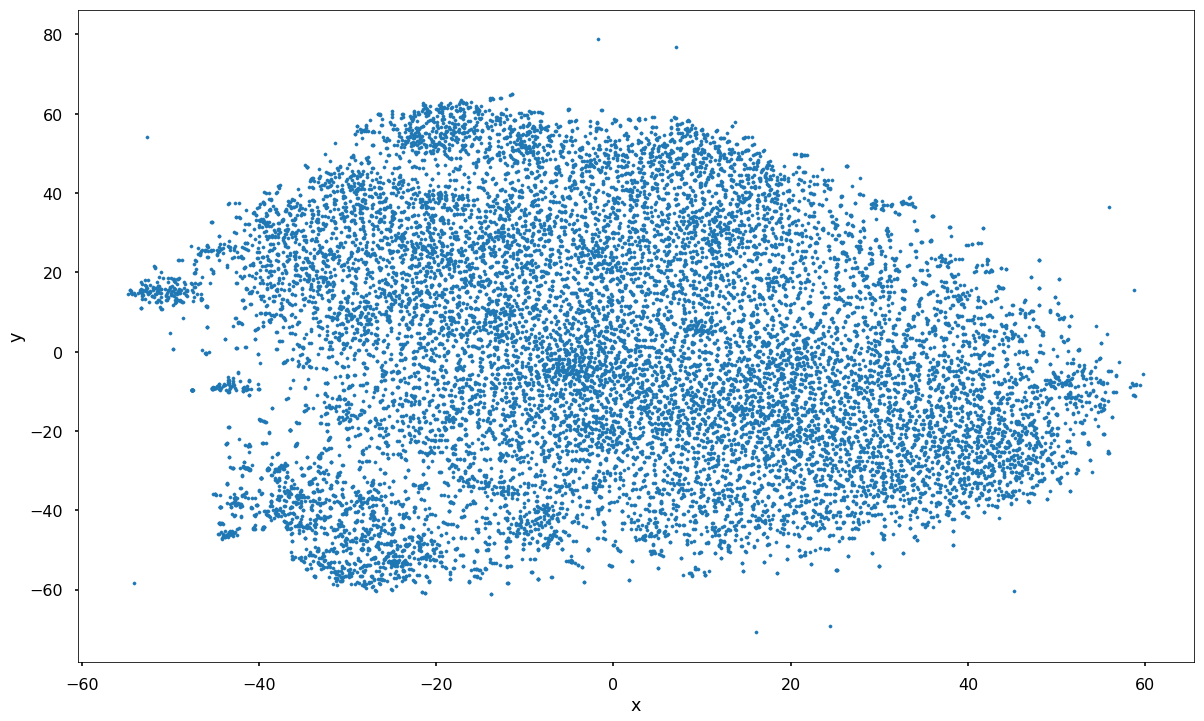

In [44]:
points.plot.scatter("x","y", s = 10, figsize = (20,12))

In [48]:
thrones2vec.wv.most_similar("Stark")

2018-09-15 14:46:30,841 : INFO : precomputing L2-norms of word weight vectors


[('Eddard', 0.6714061498641968),
 ('Lyanna', 0.5947605967521667),
 ('Hostage', 0.5711157321929932),
 ('North', 0.5513384342193604),
 ('Consider', 0.5504438877105713),
 ('NO', 0.5497077703475952),
 ('Lysa', 0.5442044734954834),
 ('Knelt', 0.5440698862075806),
 ('Benjen', 0.5409964919090271),
 ('Hungry', 0.5405076742172241)]

In [49]:
thrones2vec.most_similar("Aerys")

[('Mad', 0.7542911171913147),
 ('Jaehaerys', 0.7393438816070557),
 ('Targaryen', 0.7290462255477905),
 ('Daeron', 0.7250001430511475),
 ('II', 0.7187195420265198),
 ('murdering', 0.7073981761932373),
 ('Sack', 0.7042933702468872),
 ('Maekar', 0.6986495852470398),
 ('Beggar', 0.691177487373352),
 ('Rhaegar', 0.6791456937789917)]

In [50]:
thrones2vec.most_similar("direwolf")

[('Nymeria', 0.632735013961792),
 ('SUMMER', 0.6138530373573303),
 ('wolf', 0.6127929091453552),
 ('SHAGGYDOG', 0.5910876989364624),
 ('RICKON', 0.590835452079773),
 ('GHOST', 0.5692651271820068),
 ('Rickon', 0.5633209347724915),
 ('Grey', 0.5625030994415283),
 ('Reed', 0.5624554753303528),
 ('fluttered', 0.5497496128082275)]

In [56]:
def nearest_similarity_cosmul(start1, end1, end2):
    similarities = thrones2vec.most_similar_cosmul(
        positive = [end2, start1],
        negative = [end1]
    )
    start2 = similarities[0][0]
    print("{start1} is related to {end1}, as {start2} is related to {end2}".format(**locals()))
    return start2

In [58]:
nearest_similarity_cosmul("Stark", "Winterfell", "Riverrun")
nearest_similarity_cosmul("Jaime", "sword", "wine")
nearest_similarity_cosmul("Arya", "Nymeria", "dragons")

Stark is related to Winterfell, as Tully is related to Riverrun
Jaime is related to sword, as flagon is related to wine
Arya is related to Nymeria, as Dany is related to dragons


'Dany'

In [5]:
#doc2vec
import logging
import gensim.models as g
import codecs

C:\Users\admin\Anaconda3\lib\site-packages\gensim\utils.py:855: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [66]:
#doc2vec parameters
vector_size = 300 #차원 설정
window_size = 15 #문맥윈도우 설정
min_count = 1
sampling_threshold = 1e-5
negative_size = 5
train_epoch = 100
dm = 0 # 0 = dbow, 1 = dmpv
worker_count = 1

pretrained_emb = "C:/Users/admin/Desktop/새홀리기/doc2vec_ex/pretrained_word_embeddings.txt"

In [61]:
#훈련 데이터
train_corpus = "C:/Users/admin/Desktop/새홀리기/doc2vec_ex/train_docs.txt"

In [62]:
#훈련 모델
saved_path = "C:/Users/admin/Desktop/새홀리기/doc2vec_ex/model.bin"

In [63]:
#enable logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [67]:
#훈련 시키기
docs = g.doc2vec.TaggedLineDocument(train_corpus) #문서태그(벡터화)
model = g.Doc2Vec(docs,
                  size = vector_size,
                  min_count = min_count,
                  sample = sampling_threshold,
                  workers = worker_count,
                  hs = 0,
                  dm = dm,
                  negative = negative_size,
                  dbow_words = 1,
                  dm_concat = 1,
                  iter = train_epoch
                 )

2018-09-15 23:37:18,075 : INFO : collecting all words and their counts
2018-09-15 23:37:18,081 : INFO : PROGRESS: at example #0, processed 0 words (0/s), 0 word types, 0 tags
2018-09-15 23:37:18,142 : INFO : collected 11097 word types and 1000 unique tags from a corpus of 1000 examples and 84408 words
2018-09-15 23:37:18,149 : INFO : Loading a fresh vocabulary
2018-09-15 23:37:18,206 : INFO : min_count=1 retains 11097 unique words (100% of original 11097, drops 0)
2018-09-15 23:37:18,214 : INFO : min_count=1 leaves 84408 word corpus (100% of original 84408, drops 0)
2018-09-15 23:37:18,293 : INFO : deleting the raw counts dictionary of 11097 items
2018-09-15 23:37:18,294 : INFO : sample=1e-05 downsamples 3599 most-common words
2018-09-15 23:37:18,298 : INFO : downsampling leaves estimated 22704 word corpus (26.9% of prior 84408)
2018-09-15 23:37:18,303 : INFO : estimated required memory for 11097 words and 300 dimensions: 33381300 bytes
2018-09-15 23:37:18,354 : INFO : resetting layer 

In [68]:
#모델 저장하기
model.save(saved_path)

2018-09-15 23:43:43,387 : INFO : saving Doc2Vec object under C:/Users/admin/Desktop/새홀리기/doc2vec_ex/model.bin, separately None
2018-09-15 23:43:43,390 : INFO : not storing attribute syn0norm
2018-09-15 23:43:43,392 : INFO : not storing attribute cum_table
2018-09-15 23:43:44,170 : INFO : saved C:/Users/admin/Desktop/새홀리기/doc2vec_ex/model.bin


In [2]:
#test
model = "C:/Users/admin/Desktop/새홀리기/doc2vec_ex/model.bin"
test_docs = "C:/Users/admin/Desktop/새홀리기/doc2vec_ex/test_docs.txt"
output_file = "C:/Users/admin/Desktop/새홀리기/doc2vec_ex/test_vectors.txt"

In [3]:
#hyper-parameters
start_alpha = 0.01
infer_epoch = 1000

In [6]:
#load model
m = g.Doc2Vec.load(model)
print(m.wv.most_similar(positive = ['family', 'dog']))
test_docs = [x.strip().split() for x in codecs.open(test_docs, "r", "utf-8").readlines()]

[('andirons', 0.8237354755401611), ('employers', 0.8151814937591553), ('irons', 0.7983708381652832), ('father-in-law', 0.7842613458633423), ('1800s', 0.7825552821159363), ('harmonica', 0.7745370864868164), ('leased', 0.7736124992370605), ('harp', 0.7717717885971069), ('bag', 0.7714569568634033), ('cabinetmaker', 0.7714104652404785)]


In [72]:
output = open(output_file, "w")
for d in test_docs:
    output.write(" ".join([str(x) for x in m.infer_vector(d, alpha = start_alpha, steps = infer_epoch)]) + "\n")
output.flush()
output.close()

In [13]:
#Glove2vec
import itertools
from gensim.models.word2vec import Text8Corpus
from glove_python import Corpus, Glove

ModuleNotFoundError: No module named 'glove_python'